## Programming for Data Analytics Project
### Contact Centre Key Performance Indicators

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from IPython.display import Image

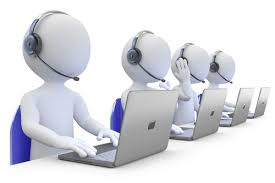

In [12]:
Image("Callpic.jpg") #load call centre image

### Contact Center
Contact centers offer omnichannel customer support for a nuber of different services including email, chat, voice over IP (VoIP) and website support. In this notebook, random data is generated to simulate key performance indicators (KPI's) associated with monthly incoming voice and data (email) communication. A key performance indicator is a measurable value that shows how effective an organisation is in achieving key business objectives. Simulated contact center communication data for this notebook is generated via the numpy random.poisson distribution. The Poisson distribution, named after French mathematician S. D. Poisson, is a statistical distribution showing the likely number of times that an event will occur within a specified period of time. (1)



### KPIs

#### Average Time in Queue 
In order to ensure your callers’ wait time is within an acceptable range – and customer satisfaction is as well – you must keep track of average time in queue. This KPI is the total time callers wait in call queues divided by the total number of calls answered by agents. It is a great indicator of whether or not your team is providing their callers with the service they deserve.(2)

#### Call Abandonment Rate
Call abandonment, or the percentage of callers who hang up before reaching an agent, is a common occurrence in the call center and has a detrimental impact on customer retention. It is very important to keep track of this KPI and make sure that it remains within objective.(2)

#### Service Level
Service level is the percentage of calls answered within a specified number of seconds.(2)

#### Average Speed of Answer
The average speed of answer is the average time it takes for calls to be answered in the call center during a specific time frame. It is an important metric when measuring a team's efficiency.(2)

#### Average Handle Time
Average handle time is the elapsed time from when an agent answers a call until the agent disconnects. It is one of the most commonly analyzed KPIs in the call center industry as it is directly related to caller satisfaction.(2)

#### Occupancy Rate
Occupancy rate measures the amount of time agents are on live calls as well as completing work associated with the calls. (2)

#### Customer Satisfaction
Customer satisfaction is a KPI that can be acquired from many different sources. Contact centers typically arrive at a customer satisfaction score by conducting customer surveys as well as obtaining quality assurance measurements. (2)


## Date simulation - fill column values !!!!!!!!!!!!!

In [13]:
rng = pd.date_range('1/1/2006', periods = 150, freq = 'M')
rng

DatetimeIndex(['2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31',
               ...
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30'],
              dtype='datetime64[ns]', length=150, freq='M')

## Generate random Call Centre data with np.random.randn using dates from rng as index

In [81]:
Calls = pd.DataFrame(np.random.poisson(3617, len(rng)), index=rng, columns = ["Calls"])
Calls["Avg_Q"] = pd.DataFrame.assign(np.random.poisson(15, len(rng)))
Calls["Aband"] = pd.DataFrame.assign(np.random.poisson(50, len(rng)))
Calls["ServLev"] = pd.DataFrame.assign(np.random.poisson(65, len(rng)))
Calls["SpdAns"] = pd.DataFrame.assign(np.random.poisson(65, len(rng)))
Calls["AvgHand"] = pd.DataFrame.assign(np.random.poisson(15, len(rng)))
Calls["eMails"] = pd.DataFrame.assign(np.random.poisson(500, len(rng)))
Calls["Avail"] = pd.DataFrame.assign(np.random.poisson(347, len(rng)))
Calls["NumAgent"] = pd.DataFrame.assign(np.random.poisson(241, len(rng)))
Calls["Ocup%"] = pd.DataFrame.assign((Calls.NumAgent / Calls.Avail)*100)
Calls["Ocup%"] = Calls["Ocup%"].apply(np.round)
Calls["CR%"] =  pd.DataFrame.assign(np.random.poisson(50, len(rng)))
Calls["Sfact"] =  pd.DataFrame.assign(np.random.poisson(70, len(rng)))
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact
2006-01-31,3470,16,55,61,63,13,479,343,252,73.0,52,69
2006-02-28,3588,12,56,55,61,16,499,327,238,73.0,58,75
2006-03-31,3565,14,67,59,67,12,463,350,239,68.0,52,74
2006-04-30,3548,15,52,58,76,20,466,353,264,75.0,46,79
2006-05-31,3595,11,62,65,58,16,475,351,238,68.0,42,77


In [82]:
Calls.mean().astype(int)

Calls       3615
Avg_Q         14
Aband         51
ServLev       64
SpdAns        66
AvgHand       15
eMails       497
Avail        345
NumAgent     243
Ocup%         70
CR%           50
Sfact         71
dtype: int32

In [83]:
Calls.describe().astype(int)

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact
count,150,150,150,150,150,150,150,150,150,150,150,150
mean,3615,14,51,64,66,15,497,345,243,70,50,71
std,57,4,7,7,7,3,21,19,14,5,6,9
min,3428,6,30,47,49,6,436,291,199,58,30,43
25%,3577,12,47,59,60,12,484,330,232,67,46,66
50%,3613,15,50,64,66,15,497,345,241,71,50,71
75%,3645,18,55,71,72,18,511,359,252,74,55,77
max,3777,26,73,88,87,26,553,392,279,86,66,91


In [84]:
Calls.loc['2017-11-30':'2018-05-31']

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact
2017-11-30,3569,18,54,47,75,13,509,340,238,70.0,50,77
2017-12-31,3586,13,47,61,54,20,514,328,260,79.0,48,67
2018-01-31,3583,9,63,73,57,17,514,358,232,65.0,55,68
2018-02-28,3565,18,56,72,70,17,500,354,248,70.0,52,73
2018-03-31,3606,13,48,63,61,19,499,328,230,70.0,49,80
2018-04-30,3582,19,73,59,66,15,498,342,235,69.0,44,87
2018-05-31,3604,15,54,58,72,16,509,336,261,78.0,37,78


In [85]:
Calls.loc['2017-11-30':'2018-05-31'].mean().astype(int)

Calls       3585
Avg_Q         15
Aband         56
ServLev       61
SpdAns        65
AvgHand       16
eMails       506
Avail        340
NumAgent     243
Ocup%         71
CR%           47
Sfact         75
dtype: int32

In [86]:
Calls.resample('Y').mean().astype(int)

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact
2006-12-31,3595,15,53,61,68,15,483,343,244,71,48,74
2007-12-31,3642,14,53,65,68,13,501,345,247,71,52,73
2008-12-31,3584,15,50,64,64,15,501,353,248,70,50,68
2009-12-31,3618,15,52,65,65,14,494,345,230,67,50,67
2010-12-31,3619,15,51,61,65,15,499,341,244,71,49,71
2011-12-31,3634,15,51,66,63,16,507,343,243,70,48,76
2012-12-31,3614,12,50,63,63,16,493,354,243,68,47,68
2013-12-31,3628,13,50,67,66,13,496,349,238,68,51,68
2014-12-31,3621,15,48,70,68,15,495,345,245,71,49,70
2015-12-31,3631,16,48,67,68,16,493,347,240,69,55,70


### SLA Calculation - speed of answer

In [87]:
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact
2006-01-31,3470,16,55,61,63,13,479,343,252,73.0,52,69
2006-02-28,3588,12,56,55,61,16,499,327,238,73.0,58,75
2006-03-31,3565,14,67,59,67,12,463,350,239,68.0,52,74
2006-04-30,3548,15,52,58,76,20,466,353,264,75.0,46,79
2006-05-31,3595,11,62,65,58,16,475,351,238,68.0,42,77


In [110]:
Temp = Calls.loc[Calls['Avg_Q'] <= 22]
Temp.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact,Aband50?,Cust_Rating
2006-01-31,3470,16,55,61,63,13,479,343,252,73.0,52,69,False,Unsatisfied
2006-02-28,3588,12,56,55,61,16,499,327,238,73.0,58,75,False,Satisfied
2006-03-31,3565,14,67,59,67,12,463,350,239,68.0,52,74,False,Neutral
2006-04-30,3548,15,52,58,76,20,466,353,264,75.0,46,79,False,Satisfied
2006-05-31,3595,11,62,65,58,16,475,351,238,68.0,42,77,False,Satisfied


### Greater or equal to !!!  Really GOOD!!!!!!!

In [89]:
Calls.loc[Calls.Aband <= 50, 'Aband50?'] = 'True' 
Calls.loc[Calls.Aband > 50, 'Aband50?'] = 'False' 
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact,Aband50?
2006-01-31,3470,16,55,61,63,13,479,343,252,73.0,52,69,False
2006-02-28,3588,12,56,55,61,16,499,327,238,73.0,58,75,False
2006-03-31,3565,14,67,59,67,12,463,350,239,68.0,52,74,False
2006-04-30,3548,15,52,58,76,20,466,353,264,75.0,46,79,False
2006-05-31,3595,11,62,65,58,16,475,351,238,68.0,42,77,False


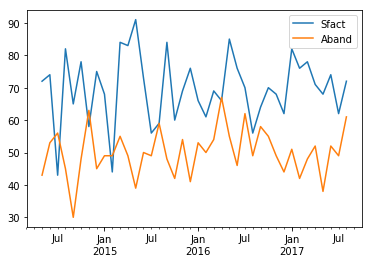

In [90]:
Calls.iloc[100:140].plot(y=['Sfact','Aband'], use_index=True)

In [91]:
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact,Aband50?
2006-01-31,3470,16,55,61,63,13,479,343,252,73.0,52,69,False
2006-02-28,3588,12,56,55,61,16,499,327,238,73.0,58,75,False
2006-03-31,3565,14,67,59,67,12,463,350,239,68.0,52,74,False
2006-04-30,3548,15,52,58,76,20,466,353,264,75.0,46,79,False
2006-05-31,3595,11,62,65,58,16,475,351,238,68.0,42,77,False


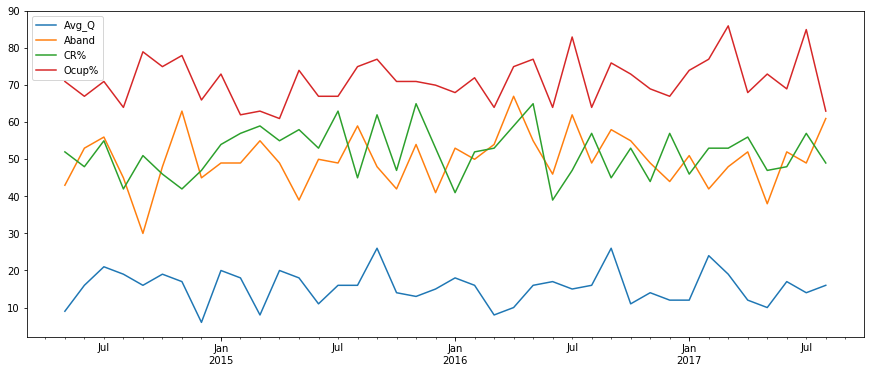

In [93]:
#Calls.plot(y=['Avg_Wait','Aband', 'ServLev', 'SpdAns', 'Ocup %', 'Sfact'], use_index=True)
Calls.iloc[100:140].plot(y=['Avg_Q','Aband', 'CR%', 'Ocup%'], use_index=True, figsize=(15,6))

### True/False Hue really good for SLA.......

In [94]:
#Calls.loc[Calls.Sfact <= 75, 'Cust Satisfied?'] = 'True' 
#Calls.loc[Calls.Sfact > 75, 'Cust Satisfied?'] = 'False' 
#Calls.head()

In [95]:
Calls1 = Calls.loc[:, 'eMails':'Ocup%']
Calls1.head()

,eMails,Avail,NumAgent,Ocup%
2006-01-31,479,343,252,73.0
2006-02-28,499,327,238,73.0
2006-03-31,463,350,239,68.0
2006-04-30,466,353,264,75.0
2006-05-31,475,351,238,68.0


In [96]:
df= Calls.loc[:, ['Calls', 'Aband']]
df.head()

,Calls,Aband
2006-01-31,3470,55
2006-02-28,3588,56
2006-03-31,3565,67
2006-04-30,3548,52
2006-05-31,3595,62


### Abandon Rate
Abandon rate is the number of calls that hang-up before connecting to an agent. This number does not include those calls that receive a busy signal.
Calculation: Abandoned Calls / Total Incoming calls
When analyzing your abandon rate, be aware that there are a small percentage of people who call the wrong number and hang-up once they hear your company name on the automated message (i.e.: "Thank you for calling ABC Corporation."). Typically these false abandon rates are calculated within the first 10 seconds and in most centres this can be between 1-2% of all total calls. This number may increase if a toll-free number is similar to another that receives high call volume.
Typically, abandon rates are linked to how fast call centre agents answer calls. The faster a call is answered, the lower the abandon rate. High abandon rates can result in lost sales opportunities and poor customer service. High abandon rates have the potential to artificially inflate future call volume as the initial customers who could not get through on the first call continue to call back until they reach an agent.
Example:
You receive 100 calls in one hour. Of those calls, 10 people hang up before speaking to an agent, so your abandon rate for the last hour has been 10%.
### Average Talk Time (ATT) & After Call Work (ACW) & Average Handle Time(AHT)
Average-Talk-Time (ATT) is the average amount of time agents talk to customers. After-Call-Work (ACW) is the average amount of time an agent takes to wrap-up a call. Average Handle Time is the combination of both ATT and ACW.
Calculation: Average-Talk-Time + After-Call-Work
Contact centres tend to place tremendous effort in driving down AHT because it is directly related to increased cost. In very large centres, an additional second of AHT can add as much as one million dollars in additional annualized costs. It is important however not just to monitor AHT but also the effectiveness of a call. The key is to find the right balance for your business.
Example:
Agent 'A' spends 190 seconds in ATT and completes all the necessary administrative duties (such as completing an order or opening a service ticket) while the customer is on the phone and spends only 20 seconds in ACW.

Agent 'B' spends 140 seconds speaking to the customer, hangs up and spends 70 seconds in ACW completing necessary administrative duties.

Both agents have an equal AHT of 210 seconds, from a cost perspective they have performed equally. The question now is which customer ended the call feeling most satisfied.

### Service Level & Average Speed of Answer (ASA)
Service level is usually defined as the percentage of calls answered within a predetermined number of seconds. If your service level target is 80/20, then you are striving to answer 80% of all calls within 20 seconds (or about 5-6 "rings"). The faster an agent answers a customer call, the higher service levels tend to be. Once your "seconds" target is established, you can report your service level as a percentage. There is no defined standard but many contact centres strive for 80/20 or 80/30 as their standard for tracking this metric. Answering calls too quickly can result in significant additional costs to the business (because of the significant labour costs required to meet very high service levels). Some centres are able to operate at 70/40 based on business needs and client expectations. It is important that this metric remain fluid, based on customer type, call type, campaign, and competitive landscape.
Average Speed of Answer (commonly referred to as ASA) is the average number of seconds it takes for a call to be answered. If calls are, on average, answered in 15 seconds, the ASA is 15 seconds for the contact centre.
Generally, the shorter the ASA, the better your Service Level and vice versa.
### First Call Resolution
First Call Resolution (FCR) is a relatively new metric to the contact centre industry. FCR measures the percentage of customer issued calls that are resolved the first time.
Calculation: Number of FCR calls / Total Number of Calls
The difficulty is defining what a successful FCR is when millions of calls are arriving in your contact centre. It is a challenge to effectively track whether a customer has received a resolution they are satisfied with.
Contact centres will use a time frame within the first customer call to determine if that call was successfully resolved in the first call. For example some centres will use a 72 hour time frame to help determine a negative or positive FCR. If a customer calls back within a 72-hour period then this is considered an unsuccessful FCR. There are inherent flaws in this calculation – for instance when a customer calls back after 72 hours with the same issue or within 72 hours with a new or different issue. Some contact centres use customer satisfaction surveys to gain further insight into FCR.
Although there are flaws with this type of tracking, monitoring the average of FCR will give you some sense as to how well your agents are able to resolve a customer’s issue on the first call.
In a time when the customer experience is paramount, FCR is a key metric to measure and understand. Some contact centres will say this is the most important metric to analyze, especially when you consider that a Customer may wait a while to reach an agent and receive extreme satisfaction with the call. This metric is also important to consider when it is compared to a Customer who reaches an agent immediately but the agent is unable to help the Customer.
A very high FCR can save your organization considerable money (the result is less repeat calls) and greatly improves customer satisfaction.
Example:
If 8 of 10 calls are resolved on the first call then that centre has reached an FCR of 80%.
7. Occupancy
Occupancy defines how well staff is scheduled for the call volumes coming into your contact centre. An inblockquoteidual’s occupancy rate can also be determined by using the same formula.
Calculation: Total Call Time / (Total Call Time + Available Time)
There is no call centre standard for occupancy but if you have low occupancy (i.e. <70%) you risk boredom by your agents. If you have consistently high occupancy (i.e. >85%) you risk over-extending your agents which can lead to higher and faster turnover. Many contact centres try to keep their occupancy metric between 70% and 80% to maintain a healthy balance.
Example:
If your contact centre has 100 hours of time your agents can take calls, and they are speaking to Customers for 80 hours of that 100 hours, your occupancy is 80/100 or 80%.



### Customer Satisfaction !!!!!!!!!!!!

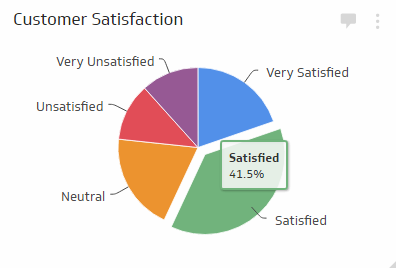

In [97]:
Image("CustSatisf.png")

In [98]:
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact,Aband50?
2006-01-31,3470,16,55,61,63,13,479,343,252,73.0,52,69,False
2006-02-28,3588,12,56,55,61,16,499,327,238,73.0,58,75,False
2006-03-31,3565,14,67,59,67,12,463,350,239,68.0,52,74,False
2006-04-30,3548,15,52,58,76,20,466,353,264,75.0,46,79,False
2006-05-31,3595,11,62,65,58,16,475,351,238,68.0,42,77,False


In [99]:
Calls.loc[Calls.Sfact >= 80, 'Cust_Rating'] = 'Very Satisfied' 
Calls.loc[Calls.Sfact < 80, 'Cust_Rating'] ='Satisfied'
Calls.loc[Calls.Sfact < 75, 'Cust_Rating'] = 'Neutral' 
Calls.loc[Calls.Sfact < 70, 'Cust_Rating'] = 'Unsatisfied' 
Calls.loc[Calls.Sfact < 60, 'Cust_Rating'] = 'Vey Unsatisfied' 
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact,Aband50?,Cust_Rating
2006-01-31,3470,16,55,61,63,13,479,343,252,73.0,52,69,False,Unsatisfied
2006-02-28,3588,12,56,55,61,16,499,327,238,73.0,58,75,False,Satisfied
2006-03-31,3565,14,67,59,67,12,463,350,239,68.0,52,74,False,Neutral
2006-04-30,3548,15,52,58,76,20,466,353,264,75.0,46,79,False,Satisfied
2006-05-31,3595,11,62,65,58,16,475,351,238,68.0,42,77,False,Satisfied


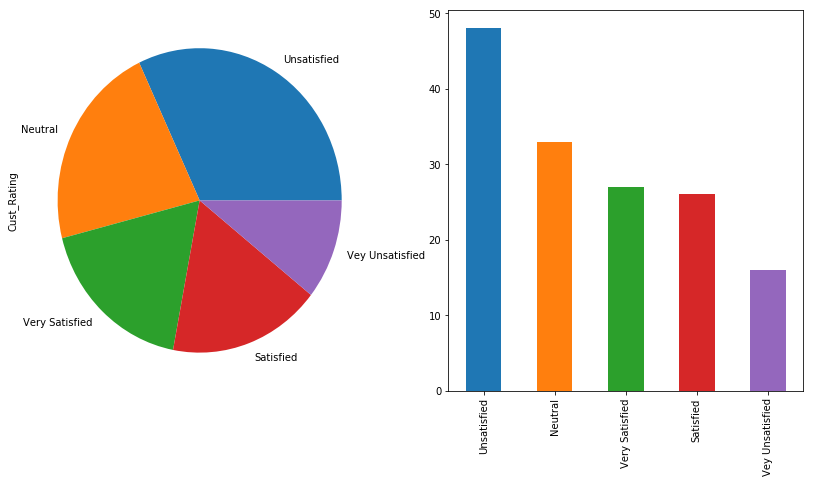

In [100]:
df4 = Calls['Cust_Rating'].value_counts()
plt.subplot(1,2,1)
df4.plot.pie(figsize=(14,7));

plt.subplot(1,2,2)
df4.plot.bar(figsize=(14,7));

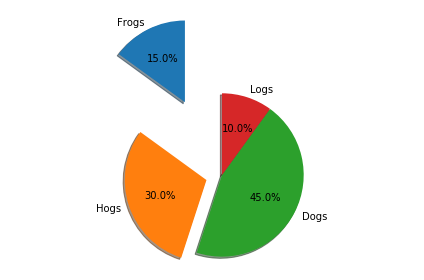

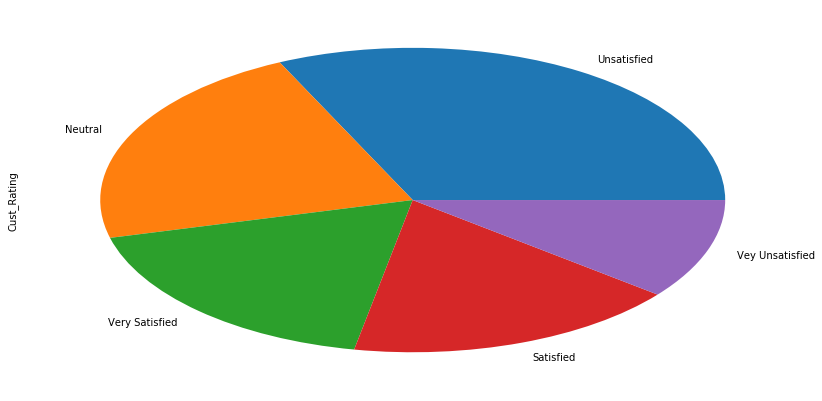

In [101]:
# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (1, 0.2, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

df4 = Calls['Cust_Rating'].value_counts()
explode = (1, 0.2, 0, 0)  
df4.plot.pie(figsize=(14,7));

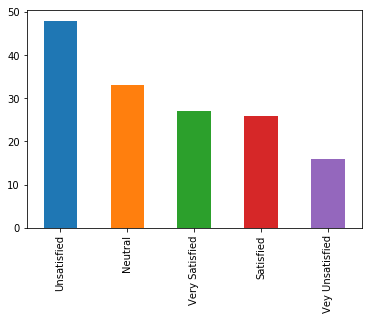

In [102]:
df4.plot.bar();

In [103]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
plt.show()

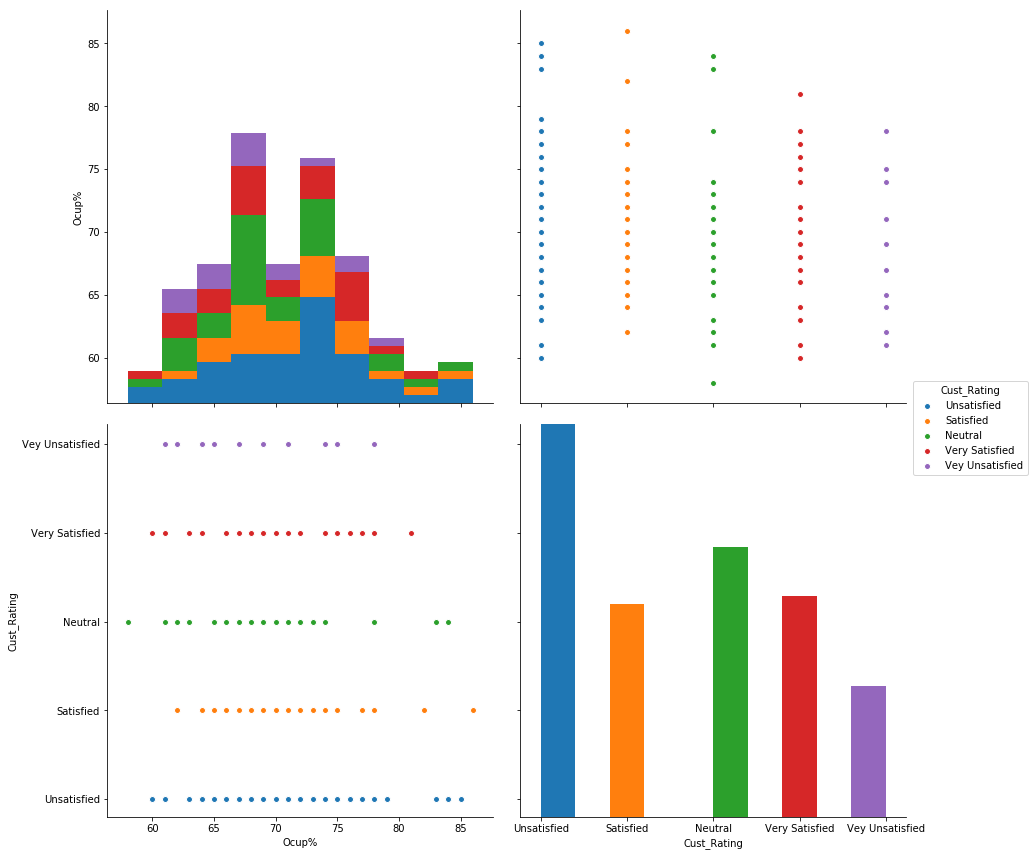

In [104]:
import seaborn as sns
sns.pairplot(Calls, hue='Cust_Rating', vars=['Ocup%', 'Cust_Rating'], size = 6)

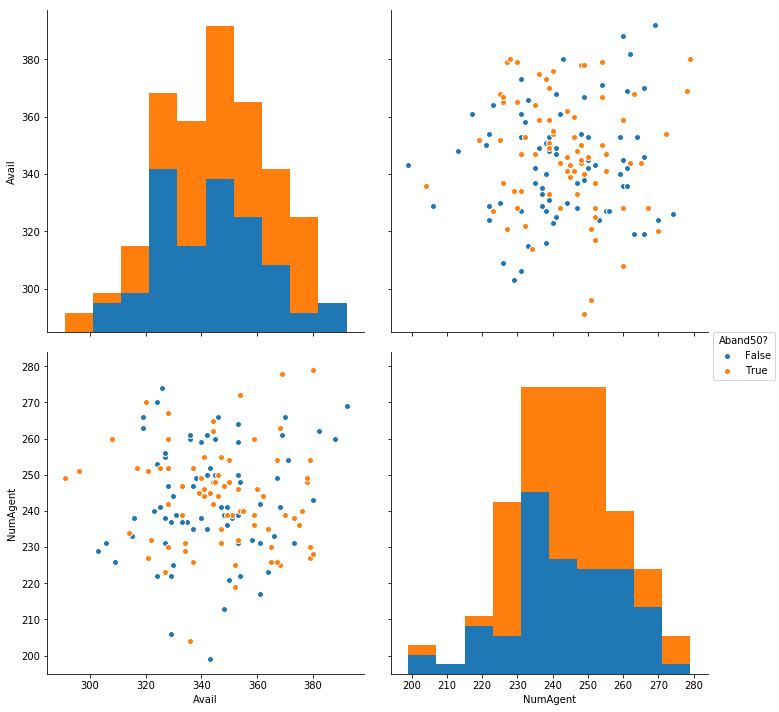

In [105]:
import seaborn as sns
sns.pairplot(Calls, hue='Aband50?', vars=['Avail', 'NumAgent'], size = 5)

### Vertical Count Plot

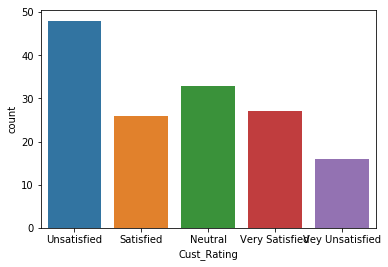

In [106]:
from seaborn import countplot
from matplotlib.pyplot import figure, show


figure()
countplot(data=Calls,x='Cust_Rating')
show()

### Horizontal Count Plot

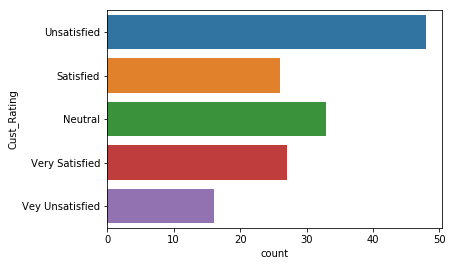

In [107]:
figure()
countplot(data=Calls,y='Cust_Rating')
show()

In [108]:
Calls.head()


,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,CR%,Sfact,Aband50?,Cust_Rating
2006-01-31,3470,16,55,61,63,13,479,343,252,73.0,52,69,False,Unsatisfied
2006-02-28,3588,12,56,55,61,16,499,327,238,73.0,58,75,False,Satisfied
2006-03-31,3565,14,67,59,67,12,463,350,239,68.0,52,74,False,Neutral
2006-04-30,3548,15,52,58,76,20,466,353,264,75.0,46,79,False,Satisfied
2006-05-31,3595,11,62,65,58,16,475,351,238,68.0,42,77,False,Satisfied


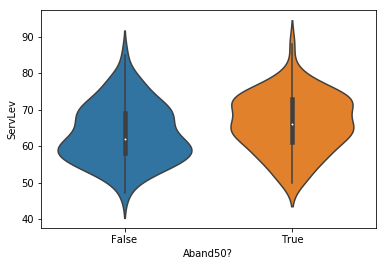

In [109]:
sns.violinplot(x='Aband50?', y='ServLev', data=Calls)

1. Poisson distribution https://www.investopedia.com/terms/p/poisson-distribution.asp
2. Average Time in Queue  https://www.talkdesk.com/blog/12-call-center-kpis-to-track-for-success/